In [ ]:
!pip install matplotlib

In [1]:
from common.fashion_mnist_data_loader import FashionMNISTDataLoader
train_loader, test_loader = FashionMNISTDataLoader.get_dataloaders(
    batch_size=32, test_batch_size=1000)

num_clients = 5
num_rounds = 10
local_epochs = 3
epochs = 10

### Centralized Model

In [2]:
from common.simple_cnn import SimpleCNN
from trainers.centralised.centralised_trainer import CentralizedTrainer, CentralizedConfig

centralized_config = CentralizedConfig(epochs=epochs)
trainer = CentralizedTrainer(SimpleCNN(), train_loader, test_loader, centralized_config)
global_model_centralized = trainer.train()

Epoch 1/10 | Train Acc: 46.51% | Train Loss: 1.6083 | Test Acc: 77.30% | Test Loss: 0.6022
Epoch 2/10 | Train Acc: 81.31% | Train Loss: 0.5120 | Test Acc: 82.46% | Test Loss: 0.4790
Epoch 3/10 | Train Acc: 84.17% | Train Loss: 0.4361 | Test Acc: 84.31% | Test Loss: 0.4414
Epoch 4/10 | Train Acc: 85.64% | Train Loss: 0.3970 | Test Acc: 85.98% | Test Loss: 0.3949
Epoch 5/10 | Train Acc: 86.50% | Train Loss: 0.3725 | Test Acc: 86.68% | Test Loss: 0.3799
Epoch 6/10 | Train Acc: 87.34% | Train Loss: 0.3556 | Test Acc: 86.44% | Test Loss: 0.3737
Epoch 7/10 | Train Acc: 87.78% | Train Loss: 0.3403 | Test Acc: 86.53% | Test Loss: 0.3755
Epoch 8/10 | Train Acc: 88.19% | Train Loss: 0.3292 | Test Acc: 87.56% | Test Loss: 0.3534
Epoch 9/10 | Train Acc: 88.49% | Train Loss: 0.3197 | Test Acc: 87.18% | Test Loss: 0.3590
Epoch 10/10 | Train Acc: 88.72% | Train Loss: 0.3120 | Test Acc: 87.94% | Test Loss: 0.3380


### FedAvg bez Differential Privacy

In [3]:
from trainers.federated_dp.federated_trainer import FederatedConfig, FederatedTrainer

federated_config_no_dp = FederatedConfig(num_clients=num_clients, num_rounds=num_rounds, local_epochs=local_epochs)
federated_trainer = FederatedTrainer(train_loader, test_loader, federated_config_no_dp)
global_model_no_dp = federated_trainer.train()


##### Running FL | num_clients=5, epsilon=None, num_rounds=10, local_epochs=3 #####

======== Round 1 ========
Client 1 | Train Acc: 80.72% | Train Loss: 0.5144
Client 2 | Train Acc: 80.86% | Train Loss: 0.5071
Client 3 | Train Acc: 79.17% | Train Loss: 0.5373
Client 4 | Train Acc: 80.07% | Train Loss: 0.5312
Client 5 | Train Acc: 77.98% | Train Loss: 0.5695
Global Model | Test Acc: 80.42% | Test Loss: 0.5192

======== Round 2 ========
Client 1 | Train Acc: 84.83% | Train Loss: 0.4243
Client 2 | Train Acc: 85.14% | Train Loss: 0.4153
Client 3 | Train Acc: 84.79% | Train Loss: 0.4347
Client 4 | Train Acc: 85.66% | Train Loss: 0.4037
Client 5 | Train Acc: 82.33% | Train Loss: 0.4522
Global Model | Test Acc: 84.70% | Test Loss: 0.4288

======== Round 3 ========
Client 1 | Train Acc: 86.22% | Train Loss: 0.3850
Client 2 | Train Acc: 86.81% | Train Loss: 0.3725
Client 3 | Train Acc: 86.92% | Train Loss: 0.3784
Client 4 | Train Acc: 86.02% | Train Loss: 0.3852
Client 5 | Train Acc: 84.15% |

### FedAvg z Differential Privacy (epsilon=3, 1, 0.1)

In [11]:
dp_epsilons = [3.0, 1.0, 0.1]
global_models_dp = []

for epsilon in dp_epsilons:
    federated_config_dp = FederatedConfig(num_clients=num_clients, num_rounds=num_rounds, local_epochs=local_epochs, epsilon=epsilon)
    federated_trainer = FederatedTrainer(train_loader, test_loader, federated_config_dp)
    global_models_dp.append(federated_trainer.train())


##### Running FL | num_clients=5, epsilon=3.0, num_rounds=10, local_epochs=3 #####

======== Round 1 ========
Client 1 | Train Acc: 66.34% | Train Loss: 0.9284
Client 2 | Train Acc: 64.35% | Train Loss: 0.9514
Client 3 | Train Acc: 63.18% | Train Loss: 1.0039
Client 4 | Train Acc: 62.25% | Train Loss: 0.9687
Client 5 | Train Acc: 66.43% | Train Loss: 0.9521
Global Model | Test Acc: 67.15% | Test Loss: 0.9331

======== Round 2 ========
Client 1 | Train Acc: 73.65% | Train Loss: 0.8640
Client 2 | Train Acc: 71.56% | Train Loss: 0.9011
Client 3 | Train Acc: 73.15% | Train Loss: 0.8861
Client 4 | Train Acc: 70.87% | Train Loss: 0.9592
Client 5 | Train Acc: 72.08% | Train Loss: 0.9076
Global Model | Test Acc: 72.31% | Test Loss: 0.9132

======== Round 3 ========
Client 1 | Train Acc: 74.87% | Train Loss: 0.9389
Client 2 | Train Acc: 72.18% | Train Loss: 1.0071
Client 3 | Train Acc: 74.50% | Train Loss: 0.9579
Client 4 | Train Acc: 74.40% | Train Loss: 0.9783
Client 5 | Train Acc: 73.80% | 

### Wizualizacja wyników

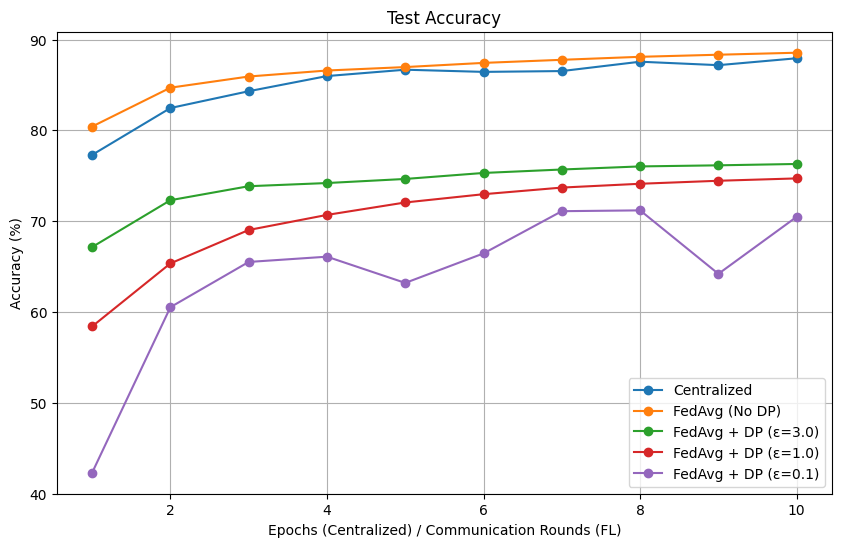

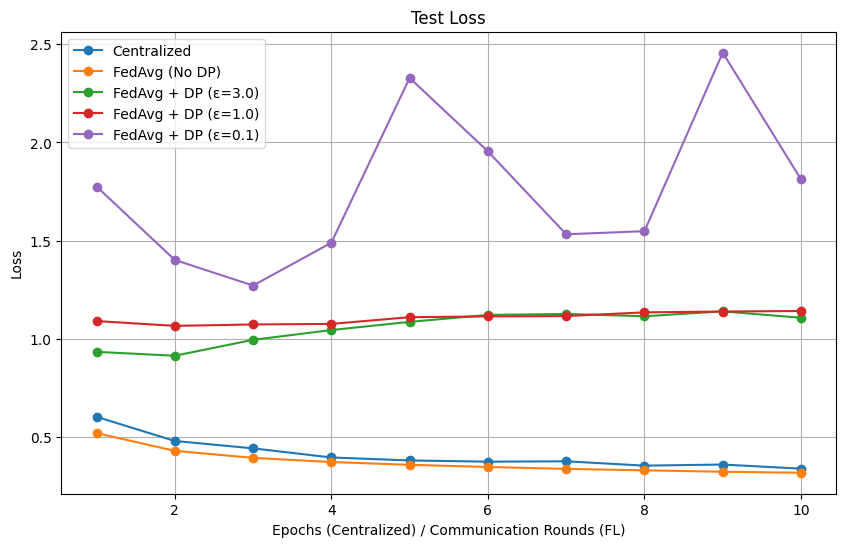

In [12]:
import matplotlib.pyplot as plt

def get_training_logs(model_wrapper):
    return model_wrapper.train_acc, model_wrapper.train_loss, model_wrapper.test_acc, model_wrapper.test_loss

def plot_results(metric_name, models, labels, ylabel, metric_type):
    plt.figure(figsize=(10, 6))

    for model, label in zip(models, labels):
        train_acc, train_loss, test_acc, test_loss = get_training_logs(model)

        x_axis = list(range(1, len(test_acc) + 1))

        if metric_type == "accuracy":
            plt.plot(x_axis, test_acc, label=label, marker="o")
        elif metric_type == "loss":
            plt.plot(x_axis, test_loss, label=label, marker="o")

    x_axis_label = "Epochs (Centralized) / Communication Rounds (FL)"
    plt.xlabel(x_axis_label)
    plt.ylabel(ylabel)
    plt.title(metric_name)
    plt.legend()
    plt.grid()
    plt.show()

models = [global_model_centralized, global_model_no_dp] + global_models_dp
labels = ["Centralized", "FedAvg (No DP)", "FedAvg + DP (ε=3.0)", "FedAvg + DP (ε=1.0)", "FedAvg + DP (ε=0.1)"]

plot_results("Test Accuracy", models, labels, "Accuracy (%)", "accuracy")
plot_results("Test Loss", models, labels, "Loss", "loss")
